# Análisis de complejidad de maximizar_ganancia

A continuación se realizará un análisis por el método de cuadrados mínimos para verificar que la función maximizar_ganancia efectivamente es $O(n^2)$.

Esta función toma como parámetro un arreglo de n números (que representan monedas), por lo que podemos crear arreglos de distinto tamaño para corroborar empíricamente que la complejidad es $O(n^2)$.

Correremos estas simulaciones para obtener los tiempos de ejecución de la función para distintas entradas, y luego haremos un ajuste por cuadrados mínimos para ver si nos alejamos de una tendencia cuadrática. Si el error es bajo, significa que la función es de complejidad cuadrática.

## Imports

In [1]:
# Importamos la función a testear
from main import maximizar_ganancia

# Imports necesarios para el notebook:

# Seed de aleatoriedad
from random import seed

# Matplotlib y Seaborn para graficar, numpy y scipy para cálculos
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

# Importamos la función para calcular los tiempos de ejecución
from analisis_complejidad_util import time_algorithm

# Siempre seteamos la seed de aleatoriedad para que los # resultados sean reproducibles
seed(237)
np.random.seed(237)

sns.set_theme()

## Dataset de prueba

Generaremos un dataset variado para probar a nuestra función. 

In [2]:
# Función para obtener un array de largo n con elementos random entre 0 y 1000
def get_random_array(size: int):
    return np.random.randint(0, 1000, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
# Representa los tamaños de la entrada, es decir el largo de los arrays de monedas
x = np.linspace(10, 1_000, 40).astype(int)

# Usamos la función time_algorithm de utils que prueba la función para las distintas entradas
# Devuelve el tiempo que tarda para cada tamaño de entrada
results = time_algorithm(maximizar_ganancia, x, lambda s: [get_random_array(s)])

## Gráfico de tiempo en función de la entrada

Graficamos el tiempo de ejecución de maximizar_ganancia en función al tamaño de la entrada que probamos anteriormente. Podemos ver que para 400 elementos tarda aproximadamente 0,02 segundos, y que para 800 de elementos tarda aproximadamente 0,08 segundos, lo que nos estaría indicando que el algoritmo es cuadrático.

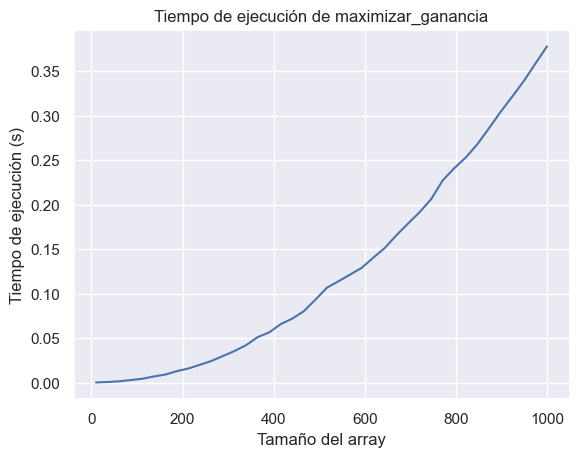

In [3]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de maximizar_ganancia')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

## Ajuste por cuadrados mínimos

Ahora vamos a ajustar por cuadrados mínimos a los resultados que obtenimos de los tiempos de ejecución de nuestra función. En nuestro caso vamos a ajustar contra la siguiente función:
$$
y = c_0 x ^2 + c_1 x + c_2
$$

Podemos ver que el error es bajo, por lo que ajusta muy bien a la parábola.

In [4]:
# Ajuste para la complejidad O(n^2)
f = lambda x, c0, c1, c2: c0 * x * x + c1 * x + c2 

# Función de scipy que ajusta a la curva f que le pasamos como parámetro
c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

# Mostramos los resultados del ajuste
print(f"Valores de los coeficientes: \n\tc_0 = {c[0]}, c_1 = {c[1]}, c_2 = {c[2]}")

# Obtenemos el error cuadrático total
r = np.sum((c[0] * x * x + c[1] * x + c[2] - [results[n] for n in x])**2)
print(f"Error cuadrático total: \n\t{r}")

Valores de los coeficientes: 
	c_0 = 3.8123117907217056e-07, c_1 = -4.776115603692792e-06, c_2 = 0.00017773984349076397
Error cuadrático total: 
	0.00017502168342102293


## Gráfico de nuestros datos y el ajuste

Se observa que los datos ajustan muy bien contra la parábola.

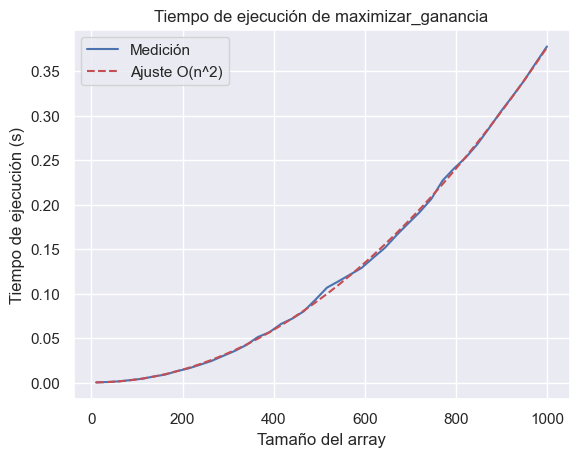

In [5]:
ax.plot(x, [c[0] * n * n + c[1] * n + c[2] for n in x], 'r--', label="Ajuste O(n^2)")
ax.legend()
fig

## Error de ajuste en función del tamaño de la entrada

En este gráfico se observa que el error de ajuste según el tamaño de la entrada es muy bajo en todos los casos, y es parejo a lo largo de todos los tamaños. Esto es otro indicio de que el algoritmo es cuadrático.

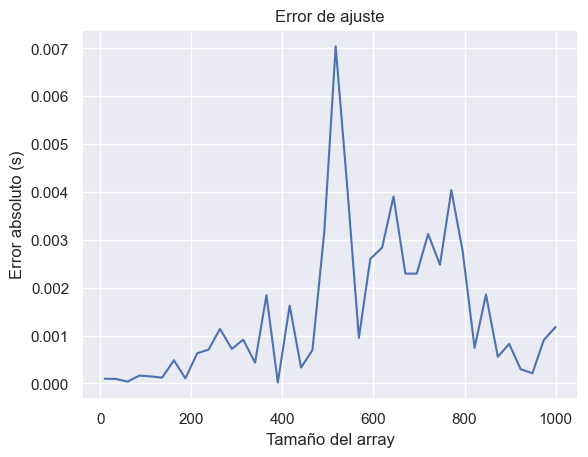

In [6]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n * n + c[1] * n + c[2] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

## Análisis de la variablidad

Vamos a repetir nuestro análisis pero cambiando el dataset. Utilizaremos números que varíen primero entre 0 y 10.000.000 aleatoriamente, y luego entre 0 y 10, para ver si cambiando la variabilidad de los datos cambia la complejidad del algoritmo.

### Alta variabilidad

In [7]:
# Función para obtener un array de largo n con elementos random entre 0 y 10000000
def get_random_array(size: int):
    return np.random.randint(0, 10_000_000, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
# Representa los tamaños de la entrada, es decir el largo de los arrays de monedas
x = np.linspace(10, 1_000, 40).astype(int)

# Usamos la función time_algorithm de utils que prueba la función para las distintas entradas
# Devuelve el tiempo que tarda para cada tamaño de entrada
results = time_algorithm(maximizar_ganancia, x, lambda s: [get_random_array(s)])

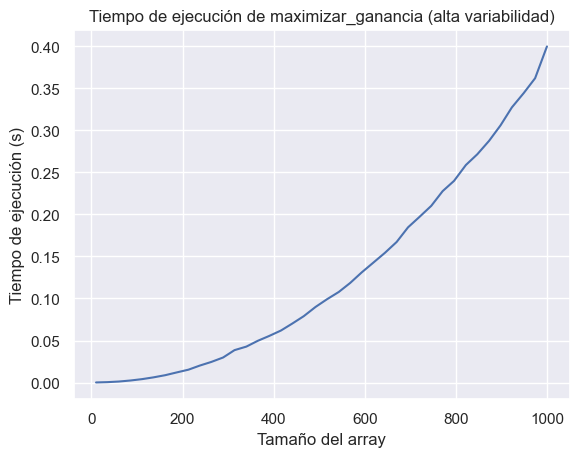

In [8]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de maximizar_ganancia (alta variabilidad)')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

In [9]:
# Ajuste para la complejidad O(n^2)
f = lambda x, c0, c1, c2: c0 * x * x + c1 * x + c2 

# Función de scipy que ajusta a la curva f que le pasamos como parámetro
c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

# Mostramos los resultados del ajuste
print(f"Valores de los coeficientes: \n\tc_0 = {c[0]}, c_1 = {c[1]}, c_2 = {c[2]}")

# Obtenemos el error cuadrático total
r = np.sum((c[0] * x * x + c[1] * x + c[2] - [results[n] for n in x])**2)
print(f"Error cuadrático total: \n\t{r}")

Valores de los coeficientes: 
	c_0 = 4.0906083701752993e-07, c_1 = -2.4827341426871176e-05, c_2 = 0.0020352496985225487
Error cuadrático total: 
	0.00030495440945438605


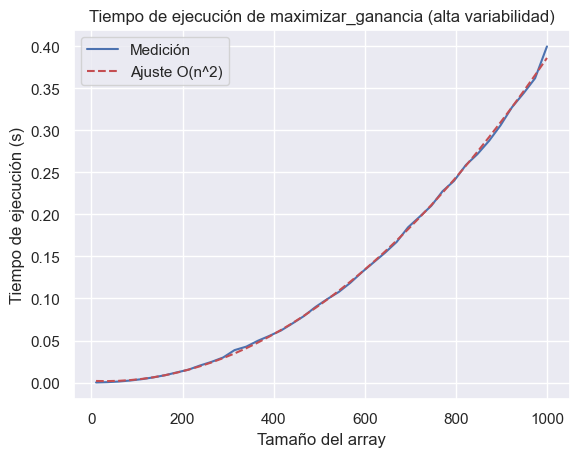

In [10]:
ax.plot(x, [c[0] * n * n + c[1] * n + c[2] for n in x], 'r--', label="Ajuste O(n^2)")
ax.legend()
fig

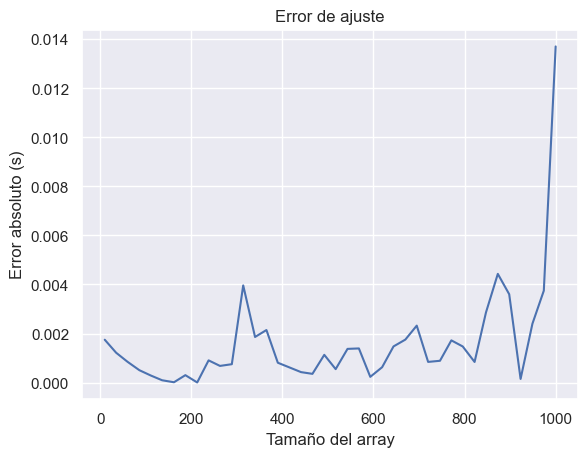

In [11]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n * n + c[1] * n + c[2] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

### Baja variabilidad

In [12]:
# Función para obtener un array de largo n con elementos random entre 0 y 1000
def get_random_array(size: int):
    return np.random.randint(0, 10, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
# Representa los tamaños de la entrada, es decir el largo de los arrays de monedas
x = np.linspace(10, 1_000, 40).astype(int)

# Usamos la función time_algorithm de utils que prueba la función para las distintas entradas
# Devuelve el tiempo que tarda para cada tamaño de entrada
results = time_algorithm(maximizar_ganancia, x, lambda s: [get_random_array(s)])

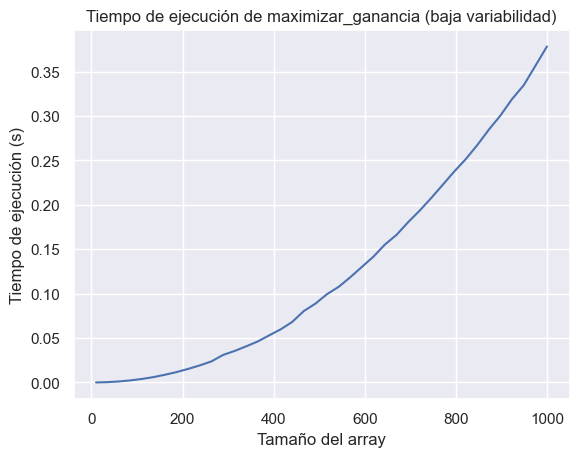

In [13]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de maximizar_ganancia (baja variabilidad)')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

In [14]:
# Ajuste para la complejidad O(n^2)
f = lambda x, c0, c1, c2: c0 * x * x + c1 * x + c2 

# Función de scipy que ajusta a la curva f que le pasamos como parámetro
c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

# Mostramos los resultados del ajuste
print(f"Valores de los coeficientes: \n\tc_0 = {c[0]}, c_1 = {c[1]}, c_2 = {c[2]}")

# Obtenemos el error cuadrático total
r = np.sum((c[0] * x * x + c[1] * x + c[2] - [results[n] for n in x])**2)
print(f"Error cuadrático total: \n\t{r}")

Valores de los coeficientes: 
	c_0 = 3.863985634161882e-07, c_1 = -1.0977115195824601e-05, c_2 = 0.0002181431492196915
Error cuadrático total: 
	5.2303129792970856e-05


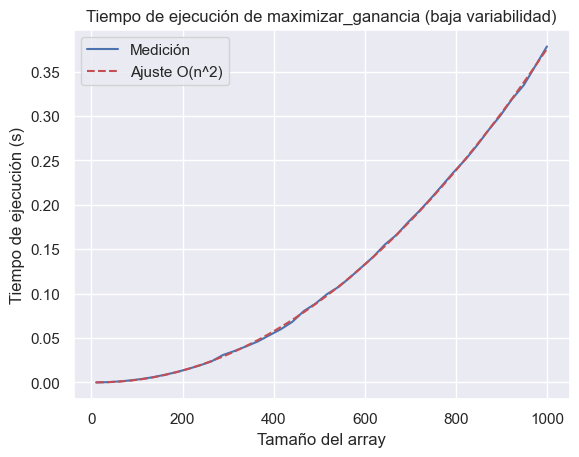

In [15]:
ax.plot(x, [c[0] * n * n + c[1] * n + c[2] for n in x], 'r--', label="Ajuste O(n^2)")
ax.legend()
fig

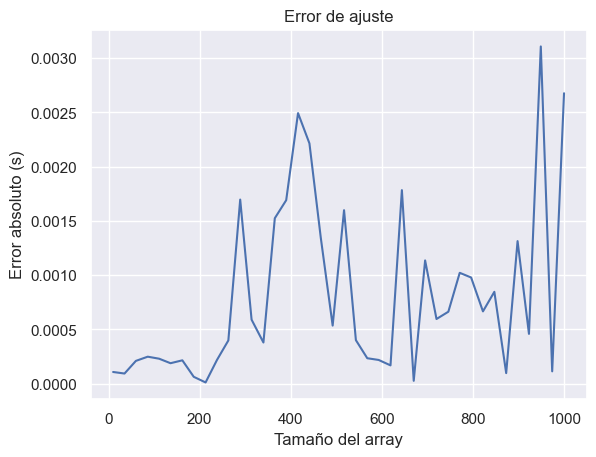

In [16]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n * n + c[1] * n + c[2] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

## Comparación con otras curvas

Podemos comparar nuestro algoritmo contra otras curvas para ver cómo ajusta. Nos puede servir para ver si ajusta peor con otras curvas, lo que indicaría que la curva que elegimos originalmente para ajustar es la correcta.

### Ajuste $O(n * log(n))$

In [17]:
# Función para obtener un array de largo n con elementos random entre 0 y 1000
def get_random_array(size: int):
    return np.random.randint(0, 1000, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
# Representa los tamaños de la entrada, es decir el largo de los arrays de monedas
x = np.linspace(10, 1_000, 40).astype(int)

# Usamos la función time_algorithm de utils que prueba la función para las distintas entradas
# Devuelve el tiempo que tarda para cada tamaño de entrada
results = time_algorithm(maximizar_ganancia, x, lambda s: [get_random_array(s)])

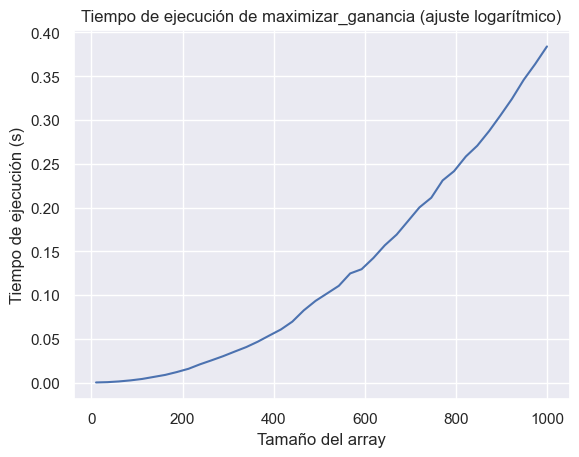

In [18]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de maximizar_ganancia (ajuste logarítmico)')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

In [19]:
# Ajuste para la complejidad O(n log n)
f = lambda x, c1, c2: c1 * x * np.log(x) + c2 

# Función de scipy que ajusta a la curva f que le pasamos como parámetro
c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

# Mostramos los resultados del ajuste
print(f"Valores de los coeficientes: \n\tc_1 = {c[0]}, c_2 = {c[1]}")

# Obtenemos el error cuadrático total
r = np.sum((c[0] * x * np.log(x) + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: \n\t{r}")

Valores de los coeficientes: 
	c_1 = 5.514405379903553e-05, c_2 = -0.04983307558230251
Error cuadrático total: 
	0.025122474710382037


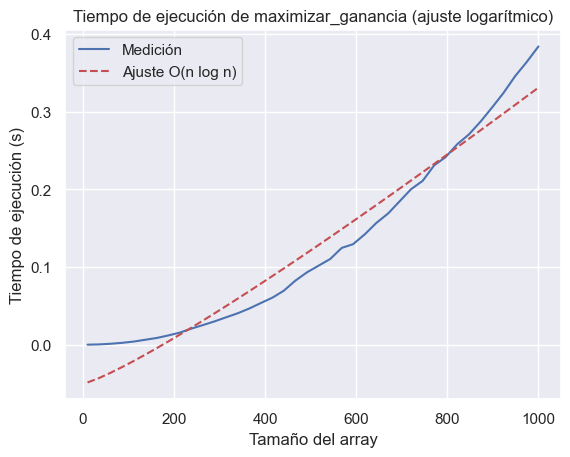

In [20]:
ax.plot(x, [c[0] * n * np.log(n) + c[1] for n in x], 'r--', label="Ajuste O(n log n)")
ax.legend()
fig